In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('after_prepros_youtong.csv', encoding='cp949')
del df['Unnamed: 0']
df = df[2:].reset_index(drop=True)
df = df[df['cor_name']!='현대오토에버']

In [4]:
del df['pre_demand_day']
del df['subs_day']
del df['cor_name']
del df['l_exp_offer_price']
del df['listed_date']

df['sicho_p']=df['sicho_p'].astype('int64')

In [5]:
x = df[["cor_rate","obligation","market_type","offer_price","profit_percent","sales","profit","shares_to_pub","sub_rate","h_exp_offer_price", "avail_for_circul"]].values
y = df["sicho_p"].values

In [6]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [8]:
features = ["cor_rate","obligation","market_type","offer_price","profit_percent","sales","profit","shares_to_pub","sub_rate","h_exp_offer_price", "avail_for_circul"]
x = pd.DataFrame(x, columns=features)
x.head()

,cor_rate,obligation,market_type,offer_price,profit_percent,sales,profit,shares_to_pub,sub_rate,h_exp_offer_price,avail_for_circul
0,1.409328,-0.612141,-0.386334,-0.262351,-1.077383,-0.196001,-0.030930,0.147957,-0.137164,-0.273417,0.138511
1,1.756333,1.231311,-0.386334,0.301962,1.381197,-0.199633,-0.061233,-0.040547,0.204926,0.131757,-0.583332
2,-1.055429,0.137600,2.588436,0.301962,-1.166808,0.202279,0.423601,-0.146580,-0.250767,0.485610,-0.586193
3,-1.188832,-0.239602,-0.386334,0.273746,-1.270213,-0.213849,-0.081015,0.006579,-0.251002,0.509920,-0.164820
4,2.849221,1.287279,-0.386334,0.725196,1.376376,-0.149456,-0.134818,0.147957,0.067850,0.604461,-0.446690


In [10]:
for i in range(2,11):
    pca = PCA(i)
    prin_com = pca.fit_transform(x)
    prin_df = pd.DataFrame(data=prin_com)
    print(sum(pca.explained_variance_ratio_))

0.43817345345991954
0.5372499895961185
0.6273793739302483
0.7118559216158612
0.7938873228652081
0.8628168397296251
0.920253182641543
0.9681359896346188
0.9990060413572442


In [11]:
pca = PCA(9)
prin_com = pca.fit_transform(x)
prin_x = pd.DataFrame(data=prin_com, columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'])
prin_x.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,-0.698077,-0.152418,0.351380,-0.189491,-0.342811,0.137243,0.669642,-0.853017,-0.336865
1,0.417482,2.463982,0.619069,0.197150,-0.545772,0.291770,0.196934,0.102525,-0.000520
2,1.768392,-1.335403,-1.521697,0.157173,0.763597,0.136776,-0.896926,0.070374,-1.177697
3,0.169309,-1.500201,0.063521,-0.175599,-0.078129,0.016415,-0.873355,-0.332252,0.696430
4,0.884945,2.909267,1.136165,-0.012598,-1.090187,0.197107,0.650263,-0.175119,-0.333184


In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    prin_x, y, test_size=0.2, random_state=42)

In [14]:
cv = ShuffleSplit(n_splits=5 , test_size=0.3, random_state=42)
pipe_linear = Pipeline([
                ('msl', MinMaxScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', LinearRegression())])
pipe_lasso = Pipeline([
                ('msl', MinMaxScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Lasso(random_state = 42))])
pipe_ridge = Pipeline([
                ('msl', MinMaxScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Ridge(random_state = 42))])
pipe_pca = Pipeline([
                ('msl', MinMaxScaler()),
                ('pca', PCA()),
                 ('fit', Ridge(random_state = 42))])
pipe_pls = Pipeline([
                ('msl', MinMaxScaler()),
                 ('fit', PLS())])
pipe_gbr = Pipeline([
                ('msl', MinMaxScaler()),
                 ('fit', GBR())])
pipe_rfr = Pipeline([
                ('msl', MinMaxScaler()),
                 ('fit', RFR())])
pipe_svr = Pipeline([
                ('msl', MinMaxScaler()),
                 ('fit', SVR())])

pipe_KR = Pipeline([
                ('msl', MinMaxScaler()),
                 ('fit', KernelRidge())])
                 
                 
### 

grid_params_linear = [{
    "poly__degree" : np.arange(1,3), 
    "fit__fit_intercept" : [True, False], 
}]
grid_params_lasso = [{
    "poly__degree" : np.arange(1,3),
    "fit__tol" : np.logspace(-5,0,10) ,
    "fit__alpha" : np.logspace(-5,1,10) ,     
                     }]
grid_params_pca = [{
    "pca__n_components" : np.arange(2,8)
}]
grid_params_ridge = [{
    "poly__degree" : np.arange(1,3),
    "fit__alpha" : np.linspace(2,5,10) ,
    "fit__solver" : [ "cholesky","lsqr","sparse_cg"] ,
    "fit__tol" : np.logspace(-5,0,10) ,
                     }]
grid_params_pls = [{
    "fit__n_components" : np.arange(2,8)
}]
min_samples_split_range = [0.5, 0.7 , 0.9]

grid_params_gbr =[{
    "fit__max_features" : ["sqrt","log2"] ,
    "fit__loss" : ["ls","lad","huber","quantile"] , 
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_rfr =[{
    "fit__max_features" : ["sqrt","log2"] , 
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_svr =[{
    "fit__kernel" : ["rbf", "linear"] ,
    "fit__degree" : [2, 3, 5] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
grid_params_KR =[{
    "fit__kernel" : ["rbf","linear"] , 
    #"fit__gamma" : np.logspace(-5,1,10) ,
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
pipe = [
    pipe_linear , pipe_lasso ,  pipe_pca ,
    pipe_ridge , pipe_pls , pipe_gbr , 
    pipe_rfr , pipe_svr , pipe_KR 
]

params = [
    grid_params_linear , grid_params_lasso , grid_params_pca,
    grid_params_ridge , grid_params_pls , grid_params_gbr ,
    grid_params_rfr , grid_params_svr , grid_params_KR
]

jobs = 20

grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'pca regression' , 
    3: 'Ridge' ,
    4: 'PLSRegression',
    5: "GradientDescentRegressor" ,
    6: "RandomForestRegressor" ,
    7: "SupportVectorRegressor" ,
    8: "Kernel RidgeRegression"
            }

model_mse = {}
model_r2 = {}
model_best_params = {}

for idx , (param , model) in enumerate(zip(params , pipe)) :
    search = GridSearchCV(model, param, scoring  = "neg_mean_squared_error" , 
                          cv=cv , n_jobs=jobs , verbose=-1 )
    search.fit(X_train , y_train)
    y_pred = search.predict(X_test)
    model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)  
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)  
    model_best_params[grid_dict.get(idx)] = search.best_params_
print("finish")

finish


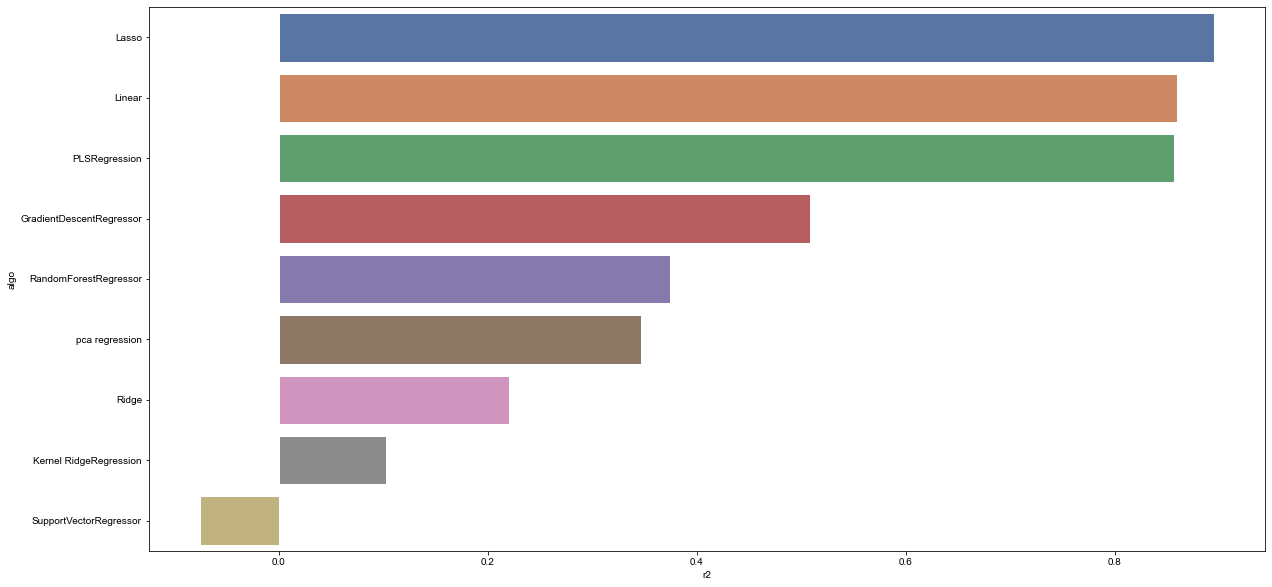

In [15]:
fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
output = pd.DataFrame([model_r2.keys() , model_r2.values()], index = ["algo","r2"]).T
output.sort_values(["r2"], ascending= False ,inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show()

In [16]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

In [17]:
print("훈련 세트의 정확도 : {:.3f}".format(lasso.score(X_train, y_train)))

print("테스트 세트의 정확도 : {:.3f}".format(lasso.score(X_test, y_test)))

print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))

print("사용한 max_iter : {}".format(lasso.n_iter_))

훈련 세트의 정확도 : 0.900
테스트 세트의 정확도 : 0.860
사용한 특성의 수 : 9
사용한 max_iter : 17
